# Section 4: Performance Metrics for Fraud Detection
### Lecture 14: Understanding the Cost of Misclassification

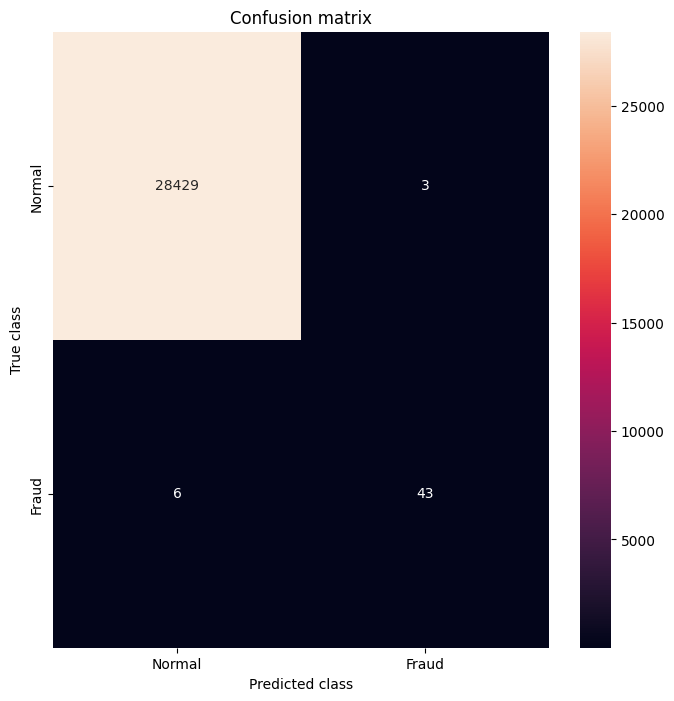

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost as xgb

df = pd.read_csv('credit_card.csv')

y = df['Class']
X = df.drop(['Class','Amount','Time'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

model_xgb = xgb.XGBClassifier(max_depth=5, scale_pos_weight=100)

model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

LABELS = ["Normal", "Fraud"]

conf_matrix_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix_xgb, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [2]:
conf_matrix_xgb

array([[28429,     3],
       [    6,    43]], dtype=int64)

In [3]:
print(conf_matrix_xgb[0][0])
print(conf_matrix_xgb[0][1])
print(conf_matrix_xgb[1][0])
print(conf_matrix_xgb[1][1])

28429
3
6
43


In [4]:
cost_tn = 1
cost_fp = 10
cost_fn = 100
cost_tp = 1

In [5]:
total_cost_of_fraud_xgb = (conf_matrix_xgb[0][0] * cost_tn) + (conf_matrix_xgb[0][1] * cost_fp) + (conf_matrix_xgb[1][0] * cost_fn) + (conf_matrix_xgb[1][1] * cost_tp)
total_cost_of_fraud_xgb

29102

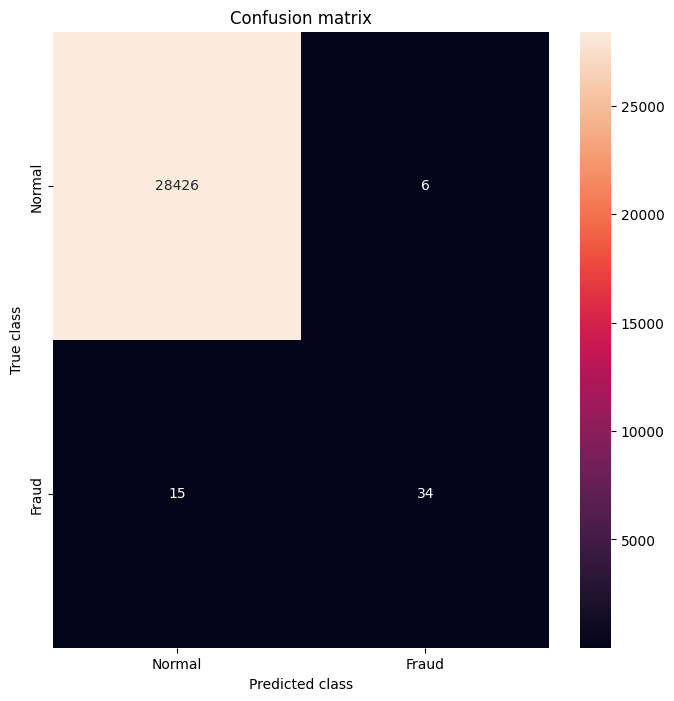

In [6]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

LABELS = ["Normal", "Fraud"]

conf_matrix_lr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix_lr, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [7]:
total_cost_of_fraud_lr = (conf_matrix_lr[0][0] * cost_tn) + (conf_matrix_lr[0][1] * cost_fp) + (conf_matrix_lr[1][0] * cost_fn) + (conf_matrix_lr[1][1] * cost_tp)
total_cost_of_fraud_lr

30020